**Chapter 4 NumPy Basics: Arrays and Vectorized Computation**

Numpy 的部件包括：
- ndarry: 一个高效、多维、提供快速面向数组的运算操作，且具有灵活的广播能力。
- 用于快速运算整个数组而不需要编写循环的数学函数。
- 用于读写数组到磁盘并用于操作内存映射文件的工具。
- 线性代数、随机数生成、以及傅里叶转换功能。
- 通过由 C, C++, Fortran 编写的库连接 Numpy 的 A C API

由于 Numpy 并没提供模型和科学函数，了解阵列和数组有助于更有效地使用类似 Pandas 的面向数组的工具。因为 Numpy 是一个很大的课题，我们在[附录A](ch-appendix-a.ipynb)介绍它的高级功能。

对于大部分的数据分析应用，我们主要集中在：
- 数据整理、清理、子集构造、过滤和转换等快速的矢量数组操作。
- 类似排序、唯一化、和集合的普通操作。
- 高效的描述统计和数据聚合 / 摘要运算。
- 用于合并和连接异构数据集的数据运算和关系数据操作。
- 将条件逻辑做为数组表达式，而不是循环（ if-elif-else）。
- 数据分组运算（聚合、转换、函数应用）

虽然 Numpy 提供了运算函数用于通常的数值数据，然而很多读者仍想要使用 pandas 做为数据分析和统计的基础工具。 Pandas 也提供了更多的 Numpy 没有的领域特定函数，类似时间序列处理等。

Numpy 用于 Python 的数值运行很重要的原因是高效处理大数据。这是因为：
- Numpy 存储数据在持续的内存块，依赖于内建的 Python 对象。
- Numpy 在数组上执行而不需要 for 循环。

对比一下以下数据：

In [3]:
import numpy as np

my_arr = np.arange(1000000)
my_list = list(range(1000000))

In [5]:
%time for _ in range(10): my_arr2 = my_arr * 2

CPU times: user 35.1 ms, sys: 0 ns, total: 35.1 ms
Wall time: 33.4 ms


In [6]:
 %time for _ in range(10): my_list2 = [x * 2 for x in my_list]

CPU times: user 664 ms, sys: 151 ms, total: 815 ms
Wall time: 823 ms


# 4.1 The NumPy ndarray: A Multidimensional Array Object

Numpy 最重要的一个特性就是 N 维数据（ndarry），它快速、灵活的大数据集。数组能够执行数学操作。

首先导入 numpy ，并生成很小的随机数组：

In [10]:
import numpy as np

data = np.random.randn(2, 3)

data

array([[-0.50429112, -1.00212444, -0.34204426],
       [ 0.25741559,  1.80310951,  0.24599607]])

然后进行数学操作：

In [11]:
data * 10

array([[ -5.04291123, -10.02124437,  -3.42044263],
       [  2.57415592,  18.03109512,   2.45996073]])

In [12]:
data + data 

array([[-1.00858225, -2.00424887, -0.68408853],
       [ 0.51483118,  3.60621902,  0.49199215]])

`ndarry` 是用于同类数据的通用多维容器，也就是说，其中的元素必须是相同类型。每个数组都有 _shape_ ，用元组来表达每个维度的大小，_dtype_ 描述元组的数据类型。

In [13]:
data.shape

(2, 3)

In [14]:
data.dtype

dtype('float64')

本章介绍基本的 numpy array 使用。

## Creating ndarrays

In [18]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [19]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [21]:
arr2.ndim

2

In [22]:
arr2.shape

(2, 4)

In [23]:
arr1.dtype

dtype('float64')

In [24]:
arr2.dtype

dtype('int64')

另外，可以常见 0 和 1 的数组：

In [25]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [30]:
np.zeros((3,6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [31]:
np.empty((2,3,2))

array([[[4.67210346e-310, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000]],

       [[0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000]]])

In [35]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

下表列出了标准数组的创建函数。

函数 | 描述
----|----
array | 转换数据（列表、元组、数组或者其他序列类型）成 ndarry，推断或者指定 dtype，默认直接复制输入数据
asarray | 转换输入到 ndarry，如果输入本身就是 ndarry 则不进行复制
arange | 内建的 range，返回不是 list，而是 ndarry
ones，ones_like | 给出全是 1 的数组，ones_like 工具另一个数组常见 shape 相同的全是 1 的数组
zeros, zeros_like | 全是 0 的数组
empty, empty_like | 常见空数组，只分配内存空间不填充数据
full, full_like | 用 fill value 创建数组
eye, identity | 创建 N * N 的正方形矩阵

## Data Types for ndarrays


In [36]:
arr1 = np.array([1,2,3], dtype=np.float64)
arr2 = np.array([1,2,3], dtype=np.int32)

In [38]:
arr1.dtype

dtype('float64')

In [39]:
arr2.dtype

dtype('int32')

In [40]:
arr = np.array([1,2,3,4,5])
arr.dtype

dtype('int64')

In [42]:
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

In [43]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

In [44]:
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10], dtype=int32)

In [45]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings

array([b'1.25', b'-9.6', b'42'], dtype='|S4')

In [46]:
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

In [48]:
int_array = np.arange(10)
calibers  = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [62]:
empty_uint32 = np.empty(8, dtype='u4')
empty_uint32

array([2137817536,      22017,          0,          0,         32,
                0,          0,          0], dtype=uint32)

## Arithmetic with NumPy Arrays

数组的重要之处在于能进行批量操作，Numpy 称之为矢量化。

In [63]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [64]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [65]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [66]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [68]:
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

In [69]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [70]:
arr2 > arr1

array([[False,  True, False],
       [ True, False,  True]])

## Basic Indexing and Slicing

In [71]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [72]:
arr[5]

5

In [76]:
arr[5:8]

array([5, 6, 7])

In [77]:
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [78]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

In [80]:
arr_slice[1]=12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [81]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [84]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [85]:
arr2d[2]

array([7, 8, 9])

In [86]:
arr2d[0][2]

3

In [87]:
arr2d[0,2]

3

In [88]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [89]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [90]:
old_values = arr3d[0].copy()
old_values

array([[1, 2, 3],
       [4, 5, 6]])

In [91]:
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [92]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [93]:
arr3d[1, 0]

array([7, 8, 9])

In [94]:
x = arr3d[1]
x

array([[ 7,  8,  9],
       [10, 11, 12]])

In [95]:
x[0]

array([7, 8, 9])

### Indexing with slices

In [97]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [98]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

In [99]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [100]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [102]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [103]:
arr2d[1, :2]

array([4, 5])

In [110]:
arr2d[:2, 2]

array([3, 6])

In [114]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [116]:
arr2d[:2, 1:]  = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

## Boolean Indexing

In [120]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)

In [121]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [122]:
data

array([[-0.24324669, -2.73618105,  0.22321494, -1.08937285],
       [-2.56879496,  1.18252435,  0.09966337, -0.84626471],
       [ 0.7112971 , -0.31284535,  0.81459116,  0.13634431],
       [ 0.37921999, -0.02666161,  0.52831746,  0.42484853],
       [ 0.9377156 ,  0.28970129,  0.01578431,  1.14861255],
       [ 0.97819169, -2.35547843,  1.92943828,  0.24796515],
       [-0.56294874,  0.26320546, -1.68064225, -1.14006873]])

In [124]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [125]:
data[names == 'Bob']

array([[-0.24324669, -2.73618105,  0.22321494, -1.08937285],
       [ 0.37921999, -0.02666161,  0.52831746,  0.42484853]])

In [126]:
data[names == 'Bob', 2:]

array([[ 0.22321494, -1.08937285],
       [ 0.52831746,  0.42484853]])

In [127]:
data[names == 'Bob', 3]

array([-1.08937285,  0.42484853])

In [128]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True])

In [129]:
data[~(names == 'Bob')]

array([[-2.56879496,  1.18252435,  0.09966337, -0.84626471],
       [ 0.7112971 , -0.31284535,  0.81459116,  0.13634431],
       [ 0.9377156 ,  0.28970129,  0.01578431,  1.14861255],
       [ 0.97819169, -2.35547843,  1.92943828,  0.24796515],
       [-0.56294874,  0.26320546, -1.68064225, -1.14006873]])

In [131]:
data[names!='Bob']

array([[-2.56879496,  1.18252435,  0.09966337, -0.84626471],
       [ 0.7112971 , -0.31284535,  0.81459116,  0.13634431],
       [ 0.9377156 ,  0.28970129,  0.01578431,  1.14861255],
       [ 0.97819169, -2.35547843,  1.92943828,  0.24796515],
       [-0.56294874,  0.26320546, -1.68064225, -1.14006873]])

In [135]:
mask = (names == 'Bob') | (names == 'Will')
mask

array([ True, False,  True,  True,  True, False, False])

In [136]:
data[mask]

array([[-0.24324669, -2.73618105,  0.22321494, -1.08937285],
       [ 0.7112971 , -0.31284535,  0.81459116,  0.13634431],
       [ 0.37921999, -0.02666161,  0.52831746,  0.42484853],
       [ 0.9377156 ,  0.28970129,  0.01578431,  1.14861255]])

In [138]:
data[data < 0] = 0
data

array([[0.        , 0.        , 0.22321494, 0.        ],
       [0.        , 1.18252435, 0.09966337, 0.        ],
       [0.7112971 , 0.        , 0.81459116, 0.13634431],
       [0.37921999, 0.        , 0.52831746, 0.42484853],
       [0.9377156 , 0.28970129, 0.01578431, 1.14861255],
       [0.97819169, 0.        , 1.92943828, 0.24796515],
       [0.        , 0.26320546, 0.        , 0.        ]])

In [139]:
data[names != 'Joe'] = 7
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.        , 1.18252435, 0.09966337, 0.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.97819169, 0.        , 1.92943828, 0.24796515],
       [0.        , 0.26320546, 0.        , 0.        ]])

## Fancy Indexing

In [140]:
arr = np.empty((8, 4))
arr

array([[ 4.67210305e-310,  0.00000000e+000,  3.08270790e-251,
         6.92177526e-310],
       [ 6.92177669e-310,  1.41830164e-102,  6.92177526e-310,
         6.92177525e-310],
       [-1.61276681e-067,  6.92177526e-310,  6.92177669e-310,
         9.05777171e-212],
       [ 6.92177525e-310,  6.92177525e-310, -2.16100811e-185,
         6.92177526e-310],
       [ 6.92177525e-310,  7.70575250e+250,  6.92177526e-310,
         6.92177525e-310],
       [-3.48956210e+065,  6.92177526e-310,  6.92177525e-310,
         7.99218911e-125],
       [ 6.92177526e-310,  6.92177525e-310,  2.35540532e+036,
         6.92177526e-310],
       [ 6.92177525e-310,  3.39513490e-019,  6.92177526e-310,
         6.92177669e-310]])

In [141]:
for i in range(8):
    arr[i] = i

arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [142]:
arr[[4,3,0,6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [145]:
arr[[-3,-5,-7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [147]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [154]:
arr[[1,5,7,2]]

array([[ 4,  5,  6,  7],
       [20, 21, 22, 23],
       [28, 29, 30, 31],
       [ 8,  9, 10, 11]])

In [157]:
arr[[1,5,7,2]][[0,3,1,2]]

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [20, 21, 22, 23],
       [28, 29, 30, 31]])

In [158]:
arr[[1,5,7,2]][:,[0,3,1,2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

## Transposing Arrays and Swapping Axes


In [160]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [165]:
arr.T

array([[-1.91052069, -1.65706876, -1.15694637,  0.68541684,  0.29080096,
        -1.13898325],
       [ 0.34621694, -0.90619279, -1.30108108,  0.61801813, -0.34680343,
         0.73709488],
       [ 0.03329648, -1.45347941, -0.43053143,  1.35614584,  1.74114637,
         1.27649989]])

进行矩阵运算时，经常用到该操作。

例如，使用 `np.dot` 计算矩阵内积：

In [163]:
arr = np.random.randn(6,3)
arr

array([[-1.91052069,  0.34621694,  0.03329648],
       [-1.65706876, -0.90619279, -1.45347941],
       [-1.15694637, -1.30108108, -0.43053143],
       [ 0.68541684,  0.61801813,  1.35614584],
       [ 0.29080096, -0.34680343,  1.74114637],
       [-1.13898325,  0.73709488,  1.27649989]])

In [167]:
np.dot(arr.T, arr)

array([[9.58613537, 1.8286607 , 2.82494372],
       [1.8286607 , 3.67939142, 3.0640054 ],
       [2.82494372, 3.0640054 , 8.79924257]])

In [173]:
arr = np.arange(16).reshape((2,2,4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [174]:
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [176]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [177]:
arr.swapaxes(1,2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

# 4.2 Universal Functions: Fast Element-Wise Array Functions

In [178]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [179]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [180]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [181]:
x = np.random.randn(8)
y = np.random.randn(8)

In [182]:
x

array([-0.00904647,  0.21278688, -0.51704174, -0.39590351,  0.01600954,
       -0.27098747,  1.23993651,  2.23256378])

In [183]:
y

array([ 0.68466397,  0.23608817,  0.68503369,  0.25086948,  0.56157927,
       -0.64183145, -0.14456644, -0.62261315])

In [185]:
np.maximum(x, y)

array([ 0.68466397,  0.23608817,  0.68503369,  0.25086948,  0.56157927,
       -0.27098747,  1.23993651,  2.23256378])

In [186]:
np.max(x)

2.2325637751901506

需要指出的是， 有写通用函数（ufunc)可以返回多个数组。`modf` 就是一个例子，它是 Python 内置函数 `divmod` 的矢量化版本，它返回浮点数组的小数和整数部分。

In [188]:
arr = np.random.randn(7) * 5
arr

array([-8.57676716, -2.64497101, -5.98481394,  3.0128434 , -9.01816453,
       -5.4296675 , -5.85564888])

In [189]:
remainder, whole_part = np.modf(arr)
remainder

array([-0.57676716, -0.64497101, -0.98481394,  0.0128434 , -0.01816453,
       -0.4296675 , -0.85564888])

In [190]:
whole_part

array([-8., -2., -5.,  3., -9., -5., -5.])

In [191]:
arr

array([-8.57676716, -2.64497101, -5.98481394,  3.0128434 , -9.01816453,
       -5.4296675 , -5.85564888])

In [193]:
np.sqrt(arr)

/home/qinjh/workspace/python/DataAnalysisWithPython/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([       nan,        nan,        nan, 1.73575442,        nan,
              nan,        nan])

In [194]:
np.sqrt(arr, arr)

/home/qinjh/workspace/python/DataAnalysisWithPython/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([       nan,        nan,        nan, 1.73575442,        nan,
              nan,        nan])

In [195]:
arr

array([       nan,        nan,        nan, 1.73575442,        nan,
              nan,        nan])

# 4.3 Array-Oriented Programming with Arrays

In [207]:
points = np.arange(-5, 5, 0.01) # 分成 1000 等份 
points

array([-5.0000000e+00, -4.9900000e+00, -4.9800000e+00, -4.9700000e+00,
       -4.9600000e+00, -4.9500000e+00, -4.9400000e+00, -4.9300000e+00,
       -4.9200000e+00, -4.9100000e+00, -4.9000000e+00, -4.8900000e+00,
       -4.8800000e+00, -4.8700000e+00, -4.8600000e+00, -4.8500000e+00,
       -4.8400000e+00, -4.8300000e+00, -4.8200000e+00, -4.8100000e+00,
       -4.8000000e+00, -4.7900000e+00, -4.7800000e+00, -4.7700000e+00,
       -4.7600000e+00, -4.7500000e+00, -4.7400000e+00, -4.7300000e+00,
       -4.7200000e+00, -4.7100000e+00, -4.7000000e+00, -4.6900000e+00,
       -4.6800000e+00, -4.6700000e+00, -4.6600000e+00, -4.6500000e+00,
       -4.6400000e+00, -4.6300000e+00, -4.6200000e+00, -4.6100000e+00,
       -4.6000000e+00, -4.5900000e+00, -4.5800000e+00, -4.5700000e+00,
       -4.5600000e+00, -4.5500000e+00, -4.5400000e+00, -4.5300000e+00,
       -4.5200000e+00, -4.5100000e+00, -4.5000000e+00, -4.4900000e+00,
       -4.4800000e+00, -4.4700000e+00, -4.4600000e+00, -4.4500000e+00,
      

In [208]:
xs, ys = np.meshgrid(points, points)

In [210]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [212]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [213]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

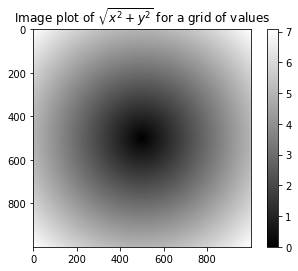

In [215]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

## Expressing Conditional Logic as Array Operations

In [216]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [217]:
result = [(x if c else y)
           for x, y, c in zip(xarr, yarr, cond)]

In [218]:
result

[1.1, 2.2, 1.3, 1.4, 2.5]